# Cascade size phase diagrams

Below we investigate the spreading of the news in a network depending on different model parameters. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

Add directory which holds the python classes

In [2]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname(os.path.abspath(''))))

In [3]:
from classes.agent import AgentState
from classes.news import News
from classes.utils import create_graph, construct_world_constant_parameters

## Threshold vs Sensation

In [4]:
def generate_share_map(thresholds, sensations, num_agents=100, graph_samples=10, independence=0.5):
    df = pd.DataFrame(columns=['threshold', 'sensation', 'number active'])
    
    print(f'Starting simulation with {num_agents} agents (this may take some time...)')    
    for threshold in thresholds:
        for sensation in sensations:
            number_samples = []
            for g_nmb in range(graph_samples):
                news_name = 1
                news = {news_name: News(news_name, sensation, decay_parameter=0.0)}
                world = construct_world_constant_parameters(num_agents, threshold, independence, news)
                
                # Activate random agent
                agent = random.choice(list(world.agents.values()))
                agent.states[news_name] = AgentState.ACTIVE
                
                number_active, _, _ = world.full_dynamics()

                number_samples.append(number_active / num_agents)
                
            df_active = pd.DataFrame([[threshold, sensation, np.mean(number_samples)]], columns=df.columns)
            df = df.append(df_active, ignore_index=True)
            
    print('Simulation completed!!!')
            
    return df.astype(float).pivot('sensation', 'threshold', 'number active')

In [5]:
thresholds = np.linspace(0.0, 1.0, 21)
fitness = np.linspace(0.0, 1.0, 21)

share_map = generate_share_map(thresholds, fitness)

Starting simulation with 100 agents (this may take some time...)
Simulation completed!!!


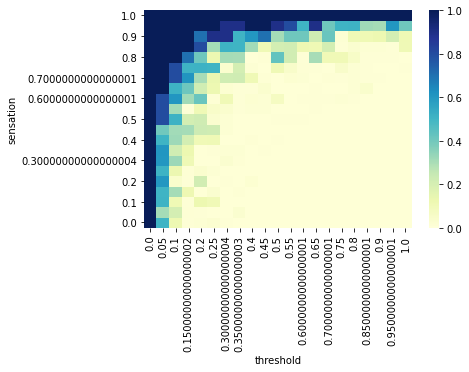

In [6]:
ax = sns.heatmap(share_map, cmap='YlGnBu', vmin=0.0, vmax=1.0)
ax.invert_yaxis()

## Independence vs Sensation

In [7]:
def generate_share_map(independences, sensations, num_agents=100, graph_samples=10, threshold=0.5):
    df = pd.DataFrame(columns=['independence', 'sensation', 'number active'])
    
    print(f'Starting simulation with {num_agents} agents (this may take some time...)')    
    for independence in independences:
        for sensation in sensations:
            number_samples = []
            for g_nmb in range(graph_samples):
                news_name = 1
                news = {news_name: News(news_name, sensation, decay_parameter=0.0)}
                world = construct_world_constant_parameters(num_agents, threshold, independence, news)
                
                # Activate random agent
                agent = random.choice(list(world.agents.values()))
                agent.states[news_name] = AgentState.ACTIVE
                
                number_active, _, _ = world.full_dynamics()

                number_samples.append(number_active / num_agents)
                
            df_active = pd.DataFrame([[independence, sensation, np.mean(number_samples)]], columns=df.columns)
            df = df.append(df_active, ignore_index=True)
            
    print('Simulation completed!!!')
            
    return df.astype(float).pivot('sensation', 'independence', 'number active')

In [8]:
opinions = np.linspace(0.0, 1.0, 21)
fitness = np.linspace(0.0, 1.0, 21)

share_map = generate_share_map(opinions, fitness)

Starting simulation with 100 agents (this may take some time...)
Simulation completed!!!


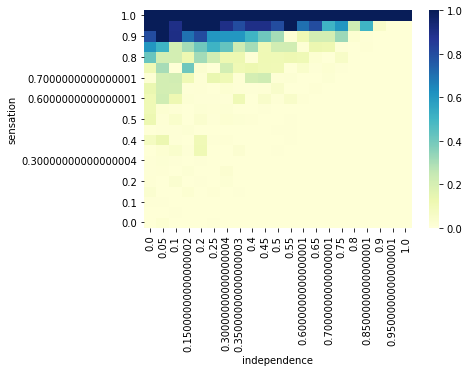

In [9]:
ax = sns.heatmap(share_map, cmap='YlGnBu', vmin=0.0, vmax=1.0)
ax.invert_yaxis()

## Decay parameter vs Sensation

In [10]:
def generate_share_map(decay_parameters, sensations, num_agents=100, graph_samples=10, threshold=0.5, independence=0.5):
    df = pd.DataFrame(columns=['decay parameter', 'sensation', 'number active'])
    
    print(f'Starting simulation with {num_agents} agents (this may take some time...)')    
    for decay_parameter in decay_parameters:
        for sensation in sensations:
            number_samples = []
            for g_nmb in range(graph_samples):
                news_name = 1
                news = {news_name: News(news_name, sensation, decay_parameter)}
                world = construct_world_constant_parameters(num_agents, threshold, independence, news)
                
                # Activate random agent
                agent = random.choice(list(world.agents.values()))
                agent.states[news_name] = AgentState.ACTIVE
                
                number_active, _, _ = world.full_dynamics()

                number_samples.append(number_active / num_agents)
                
            df_active = pd.DataFrame([[decay_parameter, sensation, np.mean(number_samples)]], columns=df.columns)
            df = df.append(df_active, ignore_index=True)
            
    print('Simulation completed!!!')
            
    return df.astype(float).pivot('sensation', 'decay parameter', 'number active')

In [11]:
decay_parameters = np.logspace(-5, 5, 11)
fitness = np.linspace(0.0, 1.0, 21)

share_map = generate_share_map(decay_parameters, fitness)

Starting simulation with 100 agents (this may take some time...)
Simulation completed!!!


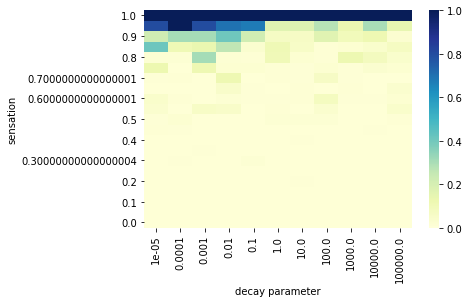

In [12]:
ax = sns.heatmap(share_map, cmap='YlGnBu', vmin=0.0, vmax=1.0)
ax.invert_yaxis()